References:
1. https://machinelearningmastery.com/how-to-model-human-activity-from-smartphone-data/
2. https://machinelearningmastery.com/evaluate-machine-learning-algorithms-for-human-activity-recognition/


## Step 1: Import Necessary Libraries

In [109]:
import numpy as np
from pandas import read_csv

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Step 2: Load Dataset

In [110]:
# load dataset
from numpy import dstack
from pandas import read_csv

# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values
 
def load_dataset_group(group, prefix=''):
    # load input data
    X = load_file(prefix + group + '/X_'+group+'.txt')
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [111]:
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    X_train, y_train = load_dataset_group('train', prefix + 'HARDataset/')
    print(X_train.shape, y_train.shape)
    # load all test
    X_test, y_test = load_dataset_group('test', prefix + 'HARDataset/')
    print(X_test.shape, y_test.shape)
    # flatten y
    y_train, y_test = y_train[:,0], y_test[:,0]
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    return X_train, y_train, X_test, y_test

# load dataset
X_train, y_train, X_test, y_test = load_dataset()
# load all train
print(X_train.shape, y_train.shape)
# load all test
print(X_test.shape, y_test.shape)

(7352, 561) (7352, 1)
(2947, 561) (2947, 1)
(7352, 561) (7352,) (2947, 561) (2947,)
(7352, 561) (7352,)
(2947, 561) (2947,)


In [112]:
X_train

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ...,
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.77913261,
         0.24914484,  0.04081119],
       [ 0.28965416, -0.01884304, -0.15828059, ..., -0.78518142,
         0.24643223,  0.02533948],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.78326693,
         0.24680852,  0.03669484]])

## Step 2: Peform Feature Scaling

In [122]:
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)
X_train

array([[ 0.20064157, -0.0636826 , -0.41962845, ..., -0.68721921,
         0.40794614, -0.00756789],
       [ 0.05594788,  0.03148567, -0.25390836, ..., -0.694138  ,
         0.40911698,  0.00787517],
       [ 0.07351535, -0.04341648, -0.07629468, ..., -0.702239  ,
         0.4102883 ,  0.02650234],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ..., -0.56584847,
         0.64059683,  0.34870928],
       [ 0.21586648, -0.02812252, -0.86770988, ..., -0.57766781,
         0.63147758,  0.29327564],
       [ 1.09620157,  0.12919873, -1.67268082, ..., -0.57392691,
         0.63274259,  0.33396081]])

## Step 3: Using different models

### (2) Random Forest Model

In [123]:
# Random Forest
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score
#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
history = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("test accuracy: ", end=" ")
print(accuracy_score(y_test, y_pred))
print("test recall: ", end=" ")
print(recall_score(y_test,y_pred , average='macro'))
print("test precision: ", end=" ")
print(precision_score(y_test, y_pred, average='macro'))
print("test f1 score: ", end=" ")
print(f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.9297590770274856
test accuracy:  0.9297590770274856
test recall:  0.926726254516863
test precision:  0.9302537995928054
test f1 score:  0.9277762874421023


### (3) Logistic Regression Model

#### - Hyperparameters Tuning for the Logistic Regression Algorithm

In [134]:
lr_clf_param = LogisticRegression()

# Choose two hyperparmeters
Cs = [0.01, 0.1, 1.0, 10, 100]
solvers = ['newton-cg', 'liblinear']

# Dictionary with parameters names (str) as keys and lists of parameter settings to try as value
grid = dict(C=Cs, solver=solvers)

folds = 5
# Loop through predefined hyperparameters (Cs, solvers) and fit LR model on the training set
grid_search = GridSearchCV(estimator=lr_clf_param, param_grid=grid, cv=folds, scoring='accuracy', error_score=0, verbose=3)
result = grid_search.fit(X_train, y_train)

print("Best accuracy score is {} using {}".format(result.best_score_, result.best_params_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.01, solver=newton-cg ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=0.01, solver=newton-cg, score=0.914, total=   1.8s
[CV] C=0.01, solver=newton-cg ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV] ............ C=0.01, solver=newton-cg, score=0.889, total=   1.8s
[CV] C=0.01, solver=newton-cg ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s


[CV] ............ C=0.01, solver=newton-cg, score=0.932, total=   1.9s
[CV] C=0.01, solver=newton-cg ........................................
[CV] ............ C=0.01, solver=newton-cg, score=0.935, total=   1.9s
[CV] C=0.01, solver=newton-cg ........................................
[CV] ............ C=0.01, solver=newton-cg, score=0.935, total=   2.1s
[CV] C=0.01, solver=liblinear ........................................
[CV] ............ C=0.01, solver=liblinear, score=0.910, total=   1.8s
[CV] C=0.01, solver=liblinear ........................................
[CV] ............ C=0.01, solver=liblinear, score=0.885, total=   1.8s
[CV] C=0.01, solver=liblinear ........................................
[CV] ............ C=0.01, solver=liblinear, score=0.920, total=   1.6s
[CV] C=0.01, solver=liblinear ........................................
[CV] ............ C=0.01, solver=liblinear, score=0.935, total=   1.7s
[CV] C=0.01, solver=liblinear ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.7min finished


Best accuracy score is 0.939344607999556 using {'C': 1.0, 'solver': 'liblinear'}


#### - Train the Logistic Regression Model 

In [135]:
lr_clf = LogisticRegression(solver='liblinear', C=1.0, random_state=0)
lr_clf.fit(X_train, y_train)

train_y_predict = lr_clf.predict(X_train)

print("training accuracy: ", end=" ")
print(accuracy_score(y_train, train_y_predict))
print("training recall: ", end=" ")
print(recall_score(y_train, train_y_predict, average='macro'))
print("training precision: ", end=" ")
print(precision_score(y_train, train_y_predict, average='macro'))
print("training f1 score: ", end=" ")
print(f1_score(y_train, train_y_predict, average='macro'))
print("___________________________________________________________________________________")
test_y_predict = lr_clf.predict(X_test)
print("test accuracy: ", end=" ")
print(accuracy_score(y_test, test_y_predict))
print("test recall: ", end=" ")
print(recall_score(y_test, test_y_predict, average='macro'))
print("test precision: ", end=" ")
print(precision_score(y_test, test_y_predict, average='macro'))
print("test f1 score: ", end=" ")
print(f1_score(y_test, test_y_predict, average='macro'))

training accuracy:  0.9945593035908596
training recall:  0.994965375638666
training precision:  0.9949990452448286
training f1 score:  0.9949814653819219
___________________________________________________________________________________
test accuracy:  0.9613165931455717
test recall:  0.9614381322685368
test precision:  0.9648567077515965
test f1 score:  0.9622675936985315


In [136]:
target_names = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING","STANDING","LAYING"]

print(classification_report(y_test, test_y_predict, target_names=target_names))

                    precision    recall  f1-score   support

           WALKING       0.96      1.00      0.98       496
  WALKING_UPSTAIRS       0.99      0.96      0.97       471
WALKING_DOWNSTAIRS       1.00      0.99      0.99       420
           SITTING       0.96      0.87      0.92       491
          STANDING       0.88      0.97      0.92       532
            LAYING       1.00      0.98      0.99       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



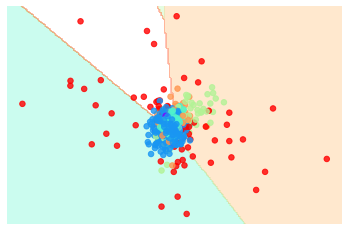

In [148]:
visualize_classifier(lr_clf, X_train, y_train, )

### (4) SVM model

In [137]:
# SVM model (Dan Li)

def svm_model(X_train, y_train, X_test, y_test):
    # Step1: finding best params
    # ml = svm.SVC()
    # # setting different kernel by change the value of parameter 'kernel'
    # param_grid = {'C': [1, 10, 100, 1000, 10000],
    #               'kernel': ['sigmoid']}
    # grid = GridSearchCV(ml, param_grid, refit=True, verbose=1, cv=15)
    # # fitting the model for grid search
    # grid_search = grid.fit(X_train, y_train)
    # best_params = grid_search.best_params_
    # print(grid_search.best_params_)


    # Step2: train and predict model by best params
    # setting different kernel by change the value of parameter 'kernel'
    model = svm.SVC(kernel='linear', C=1)
    model.fit(X_train, y_train)
    train_y_predict = model.predict(X_train)
    print("training accuracy: ", end=" ")
    print(accuracy_score(y_train, train_y_predict))
    print("training recall: ", end=" ")
    print(recall_score(y_train, train_y_predict, average='macro'))
    print("training precision: ", end=" ")
    print(precision_score(y_train, train_y_predict, average='macro'))
    print("training f1 score: ", end=" ")
    print(f1_score(y_train, train_y_predict, average='macro'))
    print("___________________________________________________________________________________")
    test_y_predict = model.predict(X_test)
    print("test accuracy: ", end=" ")
    print(accuracy_score(y_test, test_y_predict))
    print("test recall: ", end=" ")
    print(recall_score(y_test, test_y_predict, average='macro'))
    print("test precision: ", end=" ")
    print(precision_score(y_test, test_y_predict, average='macro'))
    print("test f1 score: ", end=" ")
    print(f1_score(y_test, test_y_predict, average='macro'))

    # Step3: plot confusion matrix
    # cm = confusion_matrix(y_test, test_y_predict, labels=model.classes_)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    # disp.plot()
    # plt.show()
start = time.time()
svm_model(X_train, y_train, X_test, y_test)
end = time.time()
print("The time of execution of above program is :", end - start)

training accuracy:  0.9968715995647442
training recall:  0.9971353877800189
training precision:  0.9970969252586269
training f1 score:  0.9971149855563012
___________________________________________________________________________________
test accuracy:  0.9609772650152698
test recall:  0.9599738518262332
test precision:  0.9628883486486844
test f1 score:  0.9608444740026177
The time of execution of above program is : 5.7660231590271


In [138]:
# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
    # nonlinear models
    models['knn'] = KNeighborsClassifier(n_neighbors=7)
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    # ensemble models
    models['bag'] = BaggingClassifier(n_estimators=100)
    models['rf'] = RandomForestClassifier(n_estimators=100)
    models['et'] = ExtraTreesClassifier(n_estimators=100)
    models['gbm'] = GradientBoostingClassifier(n_estimators=100)
    print('Defined %d models' % len(models))
    return models

In [139]:
# evaluate a single model
def evaluate_model(X_train, y_train, X_test, y_test, model):
    # fit the model
    model.fit(X_train, y_train)
    # make predictions
    yhat = model.predict(X_test)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    return accuracy * 100.0

In [140]:
# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X_train, y_train, X_test, y_test, models):
    results = dict()
    for name, model in models.items():
        # evaluate the model
        results[name] = evaluate_model(X_train, y_train, X_test, y_test, model)
        # show process
        print('>%s: %.3f' % (name, results[name]))
    return results

In [141]:
# print and plot the results
def summarize_results(results, maximize=True):
    # create a list of (name, mean(scores)) tuples
    mean_scores = [(k,v) for k,v in results.items()]
    # sort tuples by mean score
    mean_scores = sorted(mean_scores, key=lambda x: x[1])
    # reverse for descending order (e.g. for accuracy)
    if maximize:
        mean_scores = list(reversed(mean_scores))
    print()
    for name, score in mean_scores:
        print('Name=%s, Score=%.3f' % (name, score))

In [142]:
# get model list
models = define_models()
# evaluate models
results = evaluate_models(X_train, y_train, X_test, y_test, models)
# summarize results
summarize_results(results)

Defined 8 models
>knn: 88.633
>cart: 85.986
>svm: 95.215
>bayes: 77.027
>bag: 89.956
>rf: 92.128
>et: 93.960
>gbm: 93.892

Name=svm, Score=95.215
Name=et, Score=93.960
Name=gbm, Score=93.892
Name=rf, Score=92.128
Name=bag, Score=89.956
Name=knn, Score=88.633
Name=cart, Score=85.986
Name=bayes, Score=77.027
